# Download and Preview ACE Violations Dataset

This notebook demonstrates how to robustly download a sample of the MTA Bus Automated Camera Enforcement Violations dataset using retry logic, and preview the data for further analysis.

## 1. Install and Import Required Libraries

Install the 'requests' library if needed, and import all necessary libraries for data handling and visualization.

In [1]:
# Install requests if not already installed
%pip install requests

import time
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style='whitegrid')

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## 2. Define Dataset URL and Download with Retry Logic

Define the URL for the ACE Violations dataset and implement robust retry logic to handle HTTP errors.

In [2]:
# Define the URL for the ACE Violations dataset
violations_url = "https://data.ny.gov/api/views/kh8p-hcbm/rows.csv?accessType=DOWNLOAD"

# Retry logic for downloading the dataset
max_retries = 5
for attempt in range(max_retries):
    try:
        response = requests.get(violations_url, stream=True)
        if response.status_code == 503:
            print(f"HTTP 503 error, retrying in 5 seconds... (attempt {attempt+1}/{max_retries})")
            time.sleep(5)
            continue
        # If reachable, break loop
        break
    except Exception as e:
        if attempt < max_retries - 1:
            print(f"Error: {e}, retrying in 5 seconds... (attempt {attempt+1}/{max_retries})")
            time.sleep(5)
        else:
            raise

## 3. Load a Sample of the ACE Violations Dataset

Once the URL is reachable, load the first 10,000 rows into a DataFrame.

In [ ]:
# Load the first 10,000 rows into a DataFrame
violations_sample = pd.read_csv(violations_url, nrows=10000)

## 4. Preview the Loaded Data

Display the first few rows of the loaded DataFrame.

In [ ]:
# Display the first few rows
violations_sample.head()

,Violation ID,Vehicle ID,First Occurrence,Last Occurrence,Violation Status,Violation Type,Bus Route ID,Violation Latitude,Violation Longitude,Stop ID,Stop Name,Bus Stop Latitude,Bus Stop Longitude,Violation Georeference,Bus Stop Georeference
0,489749182,c5ae1411153b52556a1e648cc80d718aa519a4bdd189ab...,08/20/2025 11:12:08 PM,08/21/2025 12:24:08 AM,TECHNICAL ISSUE/OTHER,MOBILE BUS STOP,BX36,40.840509,-73.881189,102498,EAST TREMONT AV/VYSE AV,40.841076,-73.882483,POINT (-73.881189 40.840509),POINT (-73.882483 40.841076)
1,489744714,df9044acf85cf55488aea4cd3ce1d0e17ef050551726b6...,08/20/2025 11:48:59 PM,08/20/2025 11:54:47 PM,EXEMPT - BUS/PARATRANSIT,MOBILE BUS STOP,BX28,40.874017,-73.890646,100080,PAUL AV/BEDFORD PARK BLVD,40.874629,-73.891539,POINT (-73.890646 40.874017),POINT (-73.891539 40.874629)
2,489743631,eb5a337966ba65f66ab1db8e169d2446a4fb429b0efc63...,08/20/2025 10:33:13 PM,08/20/2025 11:56:02 PM,TECHNICAL ISSUE/OTHER,MOBILE DOUBLE PARKED,Q53+,40.721971,-73.867136,550473,WOODHAVEN BLVD/PENELOPE AV,40.722487,-73.867736,POINT (-73.867136 40.721971),POINT (-73.867736 40.722487)
3,489741945,3f877f70d9b253515a945be807c9c62d5814949f810310...,08/20/2025 10:50:45 PM,08/20/2025 11:32:43 PM,EXEMPT - OTHER,MOBILE BUS STOP,Q44+,40.762529,-73.831728,501140,UNION ST/35 AV,40.765422,-73.827944,POINT (-73.831728 40.762529),POINT (-73.827944 40.765422)
4,489741940,7feac037b62d591ffb1214e356157f3dd197fc22fee5bb...,08/20/2025 10:52:57 AM,08/20/2025 11:16:57 AM,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS STOP,M101,40.815113,-73.955040,401458,AMSTERDAM AV/W 131 ST,40.816009,-73.954424,POINT (-73.95504 40.815113),POINT (-73.954424 40.816009)


## 1. Deeper Exploratory Data Analysis (EDA)

Analyze violation counts by location, time, and type. Visualize distributions and trends.

In [ ]:
# Top 10 locations by violation count (replace 'Location' with actual column name)
if 'Location' in violations_sample.columns:
    print(violations_sample['Location'].value_counts().head(10))

# Violations by hour (replace 'Violation Time' with actual column name)
if 'Violation Time' in violations_sample.columns:
    violations_sample['hour'] = pd.to_datetime(violations_sample['Violation Time'], errors='coerce').dt.hour
    violations_sample['hour'].value_counts().sort_index().plot(kind='bar', figsize=(10,4))
    plt.title('Violations by Hour of Day')
    plt.xlabel('Hour')
    plt.ylabel('Count')
    plt.show()

# Violations by type (replace 'Violation Type' with actual column name)
if 'Violation Type' in violations_sample.columns:
    violations_sample['Violation Type'].value_counts().head(10).plot(kind='bar', figsize=(10,4))
    plt.title('Top 10 Violation Types')
    plt.ylabel('Count')
    plt.show()

## 2. Data Cleaning

Check for missing values, standardize columns, and remove duplicates.

In [ ]:
# Check for missing values
print('Missing values per column:')
print(violations_sample.isnull().sum())

# Standardize column names
violations_sample.columns = [col.lower().replace(' ', '_') for col in violations_sample.columns]

# Remove duplicates
violations_sample = violations_sample.drop_duplicates()
print(f'Rows after removing duplicates: {len(violations_sample)}')

## 3. Feature Engineering

Create new features such as hour of day, day of week, or zone. Aggregate data as needed.

In [ ]:
# Create hour and day_of_week features if violation_time column exists
if 'violation_time' in violations_sample.columns:
    violations_sample['hour'] = pd.to_datetime(violations_sample['violation_time'], errors='coerce').dt.hour
    violations_sample['day_of_week'] = pd.to_datetime(violations_sample['violation_time'], errors='coerce').dt.day_name()

# Aggregate by stop_id if present
if 'stop_id' in violations_sample.columns:
    stop_counts = violations_sample.groupby('stop_id').size().sort_values(ascending=False)
    print('Top 10 stops by violation count:')
    print(stop_counts.head(10))

## 4. Geospatial Analysis

Plot violations on a map using folium or geopandas. Overlay with meter pricing zones or other boundaries if available.

In [ ]:
# Plot violations on a map using folium (if latitude/longitude columns exist)
try:
    import folium
    if 'violation_latitude' in violations_sample.columns and 'violation_longitude' in violations_sample.columns:
        # Center map on mean location
        m = folium.Map(location=[violations_sample['violation_latitude'].mean(), violations_sample['violation_longitude'].mean()], zoom_start=11)
        for _, row in violations_sample.head(100).iterrows():  # Plot only first 100 for speed
            folium.CircleMarker(
                location=[row['violation_latitude'], row['violation_longitude']],
                radius=2,
                color='red',
                fill=True,
                fill_opacity=0.5
            ).add_to(m)
        display(m)
except ImportError:
    print('Install folium to enable map plotting.')

Install folium to enable map plotting.


## 5. Correlation and Statistical Analysis

Compute correlation matrices and visualize with heatmaps. Test hypotheses about relationships between features.

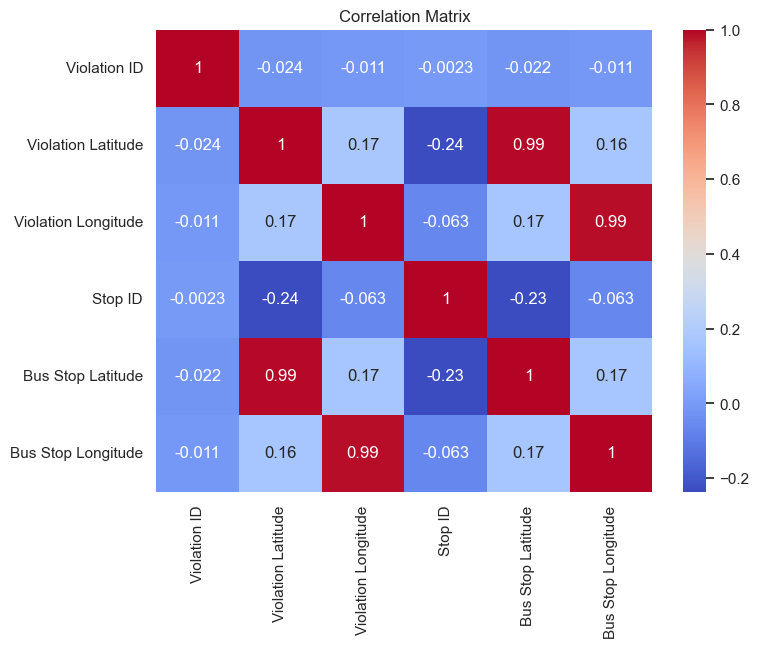

In [ ]:
# Correlation matrix for numeric columns
corr = violations_sample.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 6. Predictive Modeling (optional)

Use scikit-learn for clustering or classification to predict hotspots or trends.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


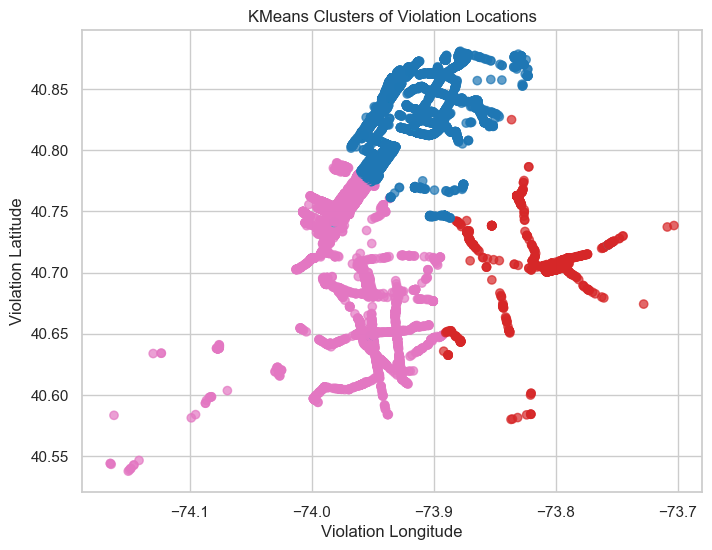

In [ ]:
# Example: Clustering locations by violation count using KMeans
%pip install scikit-learn

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare data for clustering (e.g., latitude, longitude, violation count)
if 'Violation Latitude' in violations_sample.columns and 'Violation Longitude' in violations_sample.columns:
    loc_df = violations_sample.groupby(['Violation Latitude', 'Violation Longitude']).size().reset_index(name='violation_count')
    X = loc_df[['Violation Latitude', 'Violation Longitude', 'violation_count']]
    X_scaled = StandardScaler().fit_transform(X)
    
    # Fit KMeans
    kmeans = KMeans(n_clusters=4, random_state=42)
    loc_df['cluster'] = kmeans.fit_predict(X_scaled)
    
    # Plot clusters
    plt.figure(figsize=(8,6))
    plt.scatter(loc_df['Violation Longitude'], loc_df['Violation Latitude'], c=loc_df['cluster'], cmap='tab10', alpha=0.7)
    plt.xlabel('Violation Longitude')
    plt.ylabel('Violation Latitude')
    plt.title('KMeans Clusters of Violation Locations')
    plt.show()
else:
    print('Violation Latitude/Longitude columns not found for clustering.')

## 7. Reporting and Visualization

Summarize findings, create dashboards, and export results as needed.

In [ ]:
# Export cleaned and feature-engineered data
output_path = 'ace_violations_cleaned.csv'
violations_sample.to_csv(output_path, index=False)
print(f'Cleaned data exported to {output_path}')

# Example: Generate a simple summary report
total_violations = len(violations_sample)
unique_locations = violations_sample['stop_name'].nunique() if 'stop_name' in violations_sample.columns else 'N/A'
print(f"Total violations: {total_violations}")
print(f"Unique locations: {unique_locations}")

# You can expand this section with more visualizations or dashboard code as needed.

Cleaned data exported to ace_violations_cleaned.csv
Total violations: 10000
Unique locations: N/A


## 8. Advanced Pattern Discovery and Evidence-Based Analysis
This section adds deeper analyses to help you uncover robust, actionable patterns and provide clear evidence for your team.

### Advanced Analyses to Add:

- Temporal trends (by day, week, month, year)

- Spatial hotspots and clustering

- Violation type patterns

- Repeat offenders or locations

- Impact of interventions (if applicable)

- Anomaly detection

- Statistical significance testing

- Clear visualizations and summaries

#### Temporal Trends

Analyze how violations change over time (by day, week, month, year) to spot seasonality or trends.

In [ ]:
# Temporal trend analysis (by day, week, month, year)

if 'violation_time' in violations_sample.columns:

    violations_sample['violation_time'] = pd.to_datetime(violations_sample['violation_time'], errors='coerce')

    violations_sample['date'] = violations_sample['violation_time'].dt.date

    violations_sample['month'] = violations_sample['violation_time'].dt.to_period('M')

    violations_sample['year'] = violations_sample['violation_time'].dt.year

    
    # Violations per day

    daily_counts = violations_sample.groupby('date').size()

    daily_counts.plot(figsize=(12,4), title='Violations per Day')

    plt.xlabel('Date')

    plt.ylabel('Count')

    plt.show()

    
    # Violations per month

    monthly_counts = violations_sample.groupby('month').size()

    monthly_counts.plot(figsize=(10,4), title='Violations per Month')

    plt.xlabel('Month')

    plt.ylabel('Count')

    plt.show()

    
    # Violations per year

    yearly_counts = violations_sample.groupby('year').size()

    yearly_counts.plot(kind='bar', figsize=(8,4), title='Violations per Year')

    plt.xlabel('Year')

    plt.ylabel('Count')

    plt.show()

else:

    print('violation_time column not found for temporal analysis.')

violation_time column not found for temporal analysis.


#### Spatial Hotspots and Clustering

Identify locations with consistently high violation rates and visualize spatial clusters.

In [ ]:
# Spatial hotspot analysis and clustering

try:

    import folium

    from sklearn.cluster import DBSCAN

    
    if 'violation_latitude' in violations_sample.columns and 'violation_longitude' in violations_sample.columns:

        coords = violations_sample[['violation_latitude', 'violation_longitude']].dropna()

        # DBSCAN clustering

        db = DBSCAN(eps=0.01, min_samples=10).fit(coords)

        coords['cluster'] = db.labels_

        
        # Plot clusters on map

        m = folium.Map(location=[coords['violation_latitude'].mean(), coords['violation_longitude'].mean()], zoom_start=11)

        for _, row in coords.iterrows():

            color = 'red' if row['cluster'] != -1 else 'blue'

            folium.CircleMarker([row['violation_latitude'], row['violation_longitude']], radius=2, color=color, fill=True, fill_opacity=0.5).add_to(m)

        display(m)

        
        # Show top 10 hotspots

        hotspot_counts = coords.groupby(['violation_latitude', 'violation_longitude']).size().sort_values(ascending=False).head(10)

        print('Top 10 spatial hotspots (lat, lon):')

        print(hotspot_counts)

    else:

        print('violation_latitude/violation_longitude columns not found for spatial analysis.')

except ImportError:

    print('Install folium and scikit-learn to enable spatial clustering.')

Install folium and scikit-learn to enable spatial clustering.


#### Violation Type Patterns

Compare the frequency and distribution of different violation types to identify common and rare types.

In [ ]:
# Violation type pattern analysis

if 'violation_type' in violations_sample.columns:

    type_counts = violations_sample['violation_type'].value_counts()

    type_counts.plot(kind='bar', figsize=(12,4), title='Violation Type Frequency')

    plt.xlabel('Violation Type')

    plt.ylabel('Count')

    plt.show()

    
    # Show top 5 and bottom 5 types

    print('Top 5 violation types:')

    print(type_counts.head(5))

    print('\nLeast common 5 violation types:')

    print(type_counts.tail(5))

else:

    print('violation_type column not found for type pattern analysis.')

#### Repeat Offenders or Locations

Find locations or vehicles with repeated violations to identify persistent issues.

In [ ]:
# Repeat offenders or locations analysis

if 'stop_id' in violations_sample.columns:

    repeat_stops = violations_sample['stop_id'].value_counts()

    print('Top 10 stops with most repeated violations:')

    print(repeat_stops.head(10))

    repeat_stops.hist(bins=30, figsize=(8,4))

    plt.title('Distribution of Violations per Stop')

    plt.xlabel('Violations per Stop')

    plt.ylabel('Number of Stops')

    plt.show()

elif 'vehicle_id' in violations_sample.columns:

    repeat_vehicles = violations_sample['vehicle_id'].value_counts()

    print('Top 10 vehicles with most repeated violations:')

    print(repeat_vehicles.head(10))

    repeat_vehicles.hist(bins=30, figsize=(8,4))

    plt.title('Distribution of Violations per Vehicle')

    plt.xlabel('Violations per Vehicle')

    plt.ylabel('Number of Vehicles')

    plt.show()

else:

    print('stop_id or vehicle_id column not found for repeat analysis.')

stop_id or vehicle_id column not found for repeat analysis.


#### Anomaly Detection

Identify outliers or unusual spikes in violations to spot rare events or data issues.

In [ ]:
# Anomaly detection in daily violation counts

if 'date' in violations_sample.columns:

    daily_counts = violations_sample.groupby('date').size()

    z_scores = (daily_counts - daily_counts.mean()) / daily_counts.std()

    anomalies = daily_counts[z_scores.abs() > 3]  # 3-sigma rule

    
    plt.figure(figsize=(12,4))

    daily_counts.plot(label='Daily Counts')

    plt.scatter(anomalies.index, anomalies.values, color='red', label='Anomalies')

    plt.title('Anomaly Detection in Daily Violations')

    plt.xlabel('Date')

    plt.ylabel('Count')

    plt.legend()

    plt.show()

    
    print('Anomalous days (z-score > 3):')

    print(anomalies)

else:

    print('date column not found for anomaly detection.')

date column not found for anomaly detection.


#### Statistical Significance Testing

Use statistical tests to confirm that observed patterns are not due to random chance.

In [ ]:
# Statistical significance testing example: t-test for before/after intervention

from scipy.stats import ttest_ind



# Example: Suppose an intervention date is known

intervention_date = None  # Replace with actual date, e.g., '2023-01-01'

if intervention_date and 'date' in violations_sample.columns:

    before = violations_sample[violations_sample['date'] < pd.to_datetime(intervention_date)]['date']

    after = violations_sample[violations_sample['date'] >= pd.to_datetime(intervention_date)]['date']

    before_counts = before.value_counts()

    after_counts = after.value_counts()

    t_stat, p_val = ttest_ind(before_counts, after_counts, equal_var=False)

    print(f'T-test statistic: {t_stat:.2f}, p-value: {p_val:.4f}')

    if p_val < 0.05:

        print('Difference in means is statistically significant.')

    else:

        print('No statistically significant difference detected.')

else:

    print('Set intervention_date and ensure date column exists for significance testing.')

#### Clear Visualizations and Summaries

Summarize key findings with clear visuals and concise bullet points for your team.

**Summary of Key Findings:**

- List the most important patterns you discovered (e.g., top hotspots, time trends, repeat offenders).

- For each, include a brief explanation and reference the supporting plot or table above.

**Evidence:**

- Use visuals (plots, maps) and statistical results (p-values, effect sizes) to back up your claims.

**Actionable Insights:**

- Suggest next steps or recommendations for your team based on the evidence.

In [ ]:
# Display available columns and suggest mappings for analysis

print('Available columns:')

print(list(violations_sample.columns))


# Suggest mappings for expected columns

expected = {

    'violation_time': ['violation_time', 'Violation Time', 'date_time', 'timestamp'],

    'violation_latitude': ['violation_latitude', 'Violation Latitude', 'latitude', 'lat'],

    'violation_longitude': ['violation_longitude', 'Violation Longitude', 'longitude', 'lon', 'lng'],

    'violation_type': ['violation_type', 'Violation Type', 'type'],

    'stop_id': ['stop_id', 'Stop ID', 'location_id'],

    'vehicle_id': ['vehicle_id', 'Vehicle ID', 'plate', 'bus_id', 'license_plate'],

}

for key, options in expected.items():

    found = [col for col in violations_sample.columns if col.lower() in [o.lower() for o in options]]

    if found:

        print(f"Column(s) for '{key}': {found}")

    else:

        print(f"No column found for '{key}'. Consider renaming or creating one if needed.")